In [205]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
import keras.utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [67]:
df = pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [69]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


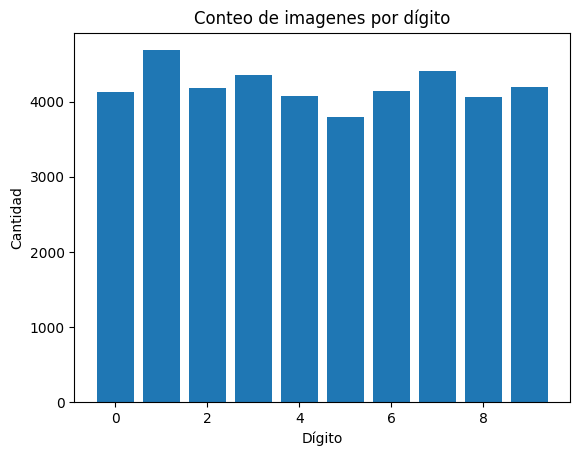

In [70]:
category_counts = df['label'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Dígito')
plt.ylabel('Cantidad')
plt.title('Conteo de imagenes por dígito')
plt.show()

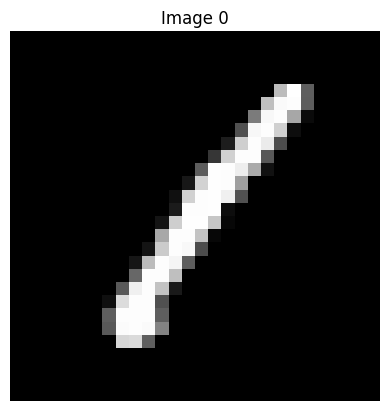

In [71]:
# extraer solo las imagenes
df_images = df.drop(df.columns[0], axis=1)

# Convertimos los valores a arreglos de numpy
image_data = df_images.values

# Como son imagenes cuadradas sacamos la raiz para determinar ancho y altura
image_size = int(np.sqrt(image_data.shape[1]))

# visualización de la primera imagen
image_index = 0

# convertimos las imagenes en matrices cuadradras con .reshape(W, H)
image = image_data[image_index].reshape(image_size, image_size)

# Desplegamos la imagen
plt.imshow(image, cmap=plt.cm.gray)  # Assuming grayscale images
plt.title(f'Image {image_index}')
plt.axis('off')
plt.show()

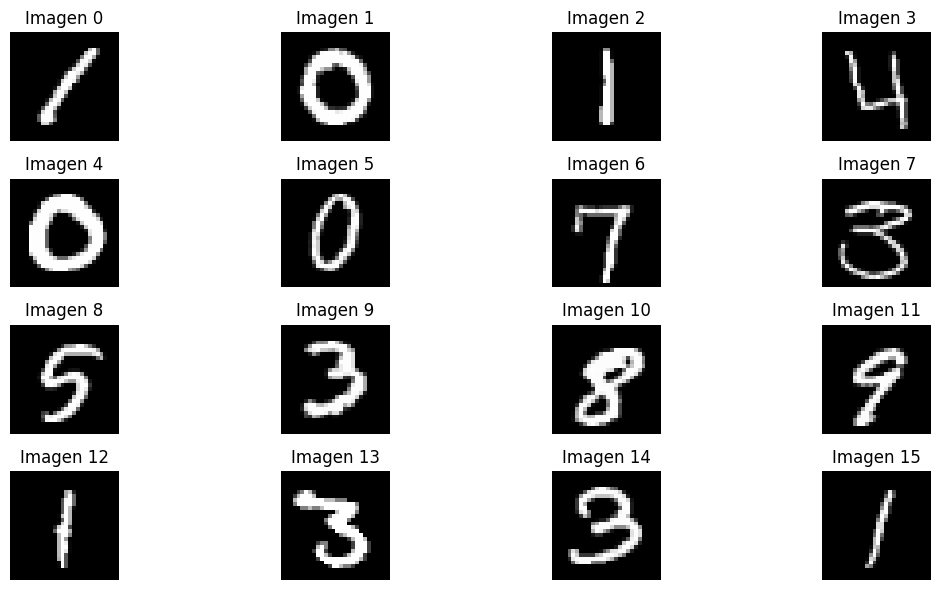

In [72]:
num_rows = 4
num_cols = 4

plt.figure(figsize=(12, 6))

for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    image = image_data[i].reshape(image_size, image_size)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f'Imagen {i}')

plt.tight_layout()
plt.show()

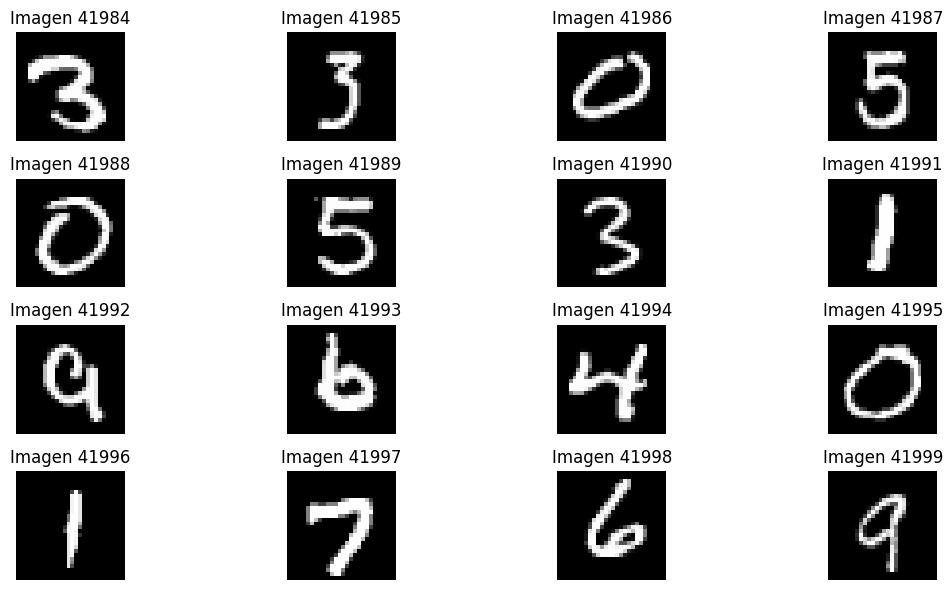

In [73]:
plt.figure(figsize=(12, 6))

for i in range(41984, 42000):
    plt.subplot(4, 4, i - 41983)
    image = image_data[i].reshape(image_size, image_size)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f'Imagen {i}')

plt.tight_layout()
plt.show()

In [74]:
X_train = df.iloc[:,1:]
X_train.head(), X_train.shape

(   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0       0       0       0       0       0       0       0       0       0   
 1       0       0       0       0       0       0       0       0       0   
 2       0       0       0       0       0       0       0       0       0   
 3       0       0       0       0       0       0       0       0       0   
 4       0       0       0       0       0       0       0       0       0   
 
    pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
 0       0  ...         0         0         0         0         0         0   
 1       0  ...         0         0         0         0         0         0   
 2       0  ...         0         0         0         0         0         0   
 3       0  ...         0         0         0         0         0         0   
 4       0  ...         0         0         0         0         0         0   
 
    pixel780  pixel781  pixel782  pixel783  
 0       

In [75]:
y_train = df.iloc[:,0]
y_train.head(), y_train.shape

(0    1
 1    0
 2    1
 3    4
 4    0
 Name: label, dtype: int64,
 (42000,))

In [91]:
df_test = pd.read_csv('test.csv')
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [93]:
df_test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [76]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.astype('float32'))

In [77]:
X_train = X_train.reshape(-1, image_size, image_size, 1)
X_train.shape

(42000, 28, 28, 1)

In [96]:
X_test = df_test.values
X_test = scaler.fit_transform(X_test.astype('float32'))
X_test = X_test.reshape(-1, image_size, image_size, 1)
print(X_test.shape)

(28000, 28, 28, 1)


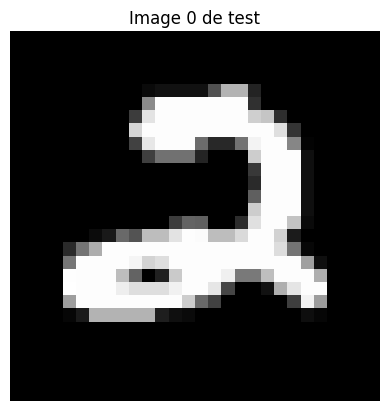

In [101]:
# Desplegamos la imagen del archivo de prueba
plt.imshow(df_test.iloc[0,:].values.reshape(image_size, image_size), cmap=plt.cm.gray)  # Assuming grayscale images
plt.title(f'Image {image_index} de test')
plt.axis('off')
plt.show()

### Red Neuronal sencilla (Simple)

In [193]:
modelo_simple = Sequential()
modelo_simple.add(layers.Dense(10, activation='softmax', input_shape=(784,)))

In [194]:
modelo_simple.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo_simple.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [195]:
X_train = df.iloc[:,1:]
X_train = scaler.fit_transform(X_train.astype('float32'))
X_train = X_train.reshape((X_train.shape[0],-1))
X_train.shape

(42000, 784)

In [196]:
y_train = df.iloc[:,0]
y_train.head(), y_train.shape

(0    1
 1    0
 2    1
 3    4
 4    0
 Name: label, dtype: int64,
 (42000,))

In [197]:
history_simple = modelo_simple.fit(X_train, y_train, batch_size=32, verbose=1, validation_split=0.2, epochs=25)

Epoch 1/25
1050/1050 [==============================] - 2s 1ms/step - loss: 0.5625 - accuracy: 0.8560 - val_loss: 0.3483 - val_accuracy: 0.9075
Epoch 2/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3288 - accuracy: 0.9097 - val_loss: 0.3040 - val_accuracy: 0.9160
Epoch 3/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2966 - accuracy: 0.9174 - val_loss: 0.2908 - val_accuracy: 0.9207
Epoch 4/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2810 - accuracy: 0.9207 - val_loss: 0.2861 - val_accuracy: 0.9202
Epoch 5/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2703 - accuracy: 0.9233 - val_loss: 0.2769 - val_accuracy: 0.9235
Epoch 6/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2631 - accuracy: 0.9257 - val_loss: 0.2732 - val_accuracy: 0.9245
Epoch 7/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2578 - accuracy: 0.9265 - val_loss: 0.2757 - val_accuracy:

In [198]:
accuracy_simple = history_simple.history['accuracy']
val_accuracy_simple = history_simple.history['val_accuracy']
loss_simple = history_simple.history['loss']
val_loss_simple = history_simple.history['val_loss']
epochs_simple = range(len(accuracy_simple))

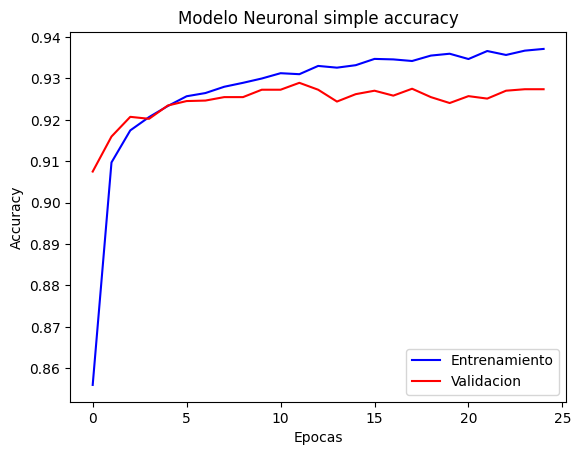

In [199]:
plt.plot(epochs_simple, accuracy_simple, 'b')
plt.plot(epochs_simple, val_accuracy_simple, 'r')
plt.title('Modelo Neuronal simple accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validacion'], loc='lower right')
plt.show()

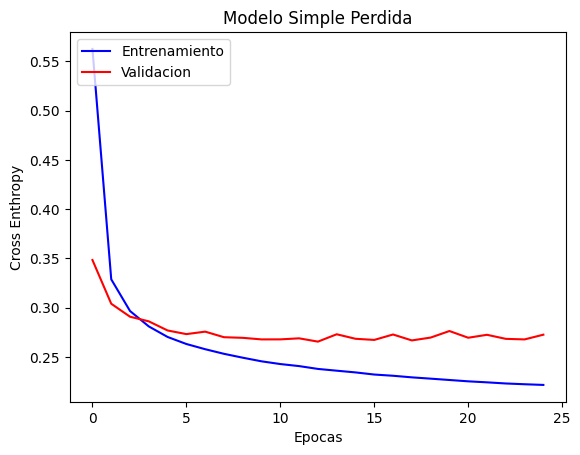

In [200]:
plt.plot(epochs_simple, loss_simple, 'b')
plt.plot(epochs_simple, val_loss_simple, 'r')
plt.title('Modelo Simple Perdida')
plt.ylabel('Cross Enthropy')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validacion'], loc='upper left')
plt.show()

In [201]:
{key: value[24] for key, value in history_simple.history.items()}

{'loss': 0.2216131091117859,
 'accuracy': 0.9371131062507629,
 'val_loss': 0.27257809042930603,
 'val_accuracy': 0.9273809790611267}

### El Modelo de Simple en su última iteración registró una precisión de 93.71% en la data de entrenamiento y 92.73% en la de validacion

### Modelo Deep Learning (DL)

In [78]:
modelo_dl = Sequential()
modelo_dl.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(image_size, image_size, 1)))
modelo_dl.add(layers.MaxPool2D())
modelo_dl.add(layers.Dropout(0.4))
modelo_dl.add(layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
modelo_dl.add(layers.MaxPool2D())
modelo_dl.add(layers.Dropout(0.5))
modelo_dl.add(layers.Flatten())
modelo_dl.add(layers.Dense(64, activation='relu'))
modelo_dl.add(layers.Dropout(0.4))
modelo_dl.add(layers.Dense(10, activation='softmax'))

In [79]:
modelo_dl.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelo_dl.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 7, 7, 64)         

In [80]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_train.shape

(42000, 10)

In [82]:
early_stopping = EarlyStopping(monitor='val_loss',
          patience=10,
          verbose=1,
          mode='min')
mcp_save = ModelCheckpoint('reconocimiento_digito.10e',
         save_best_only=True,
         monitor='val_loss',
         verbose=1,
         mode='auto')

In [84]:
history_dl = modelo_dl.fit(X_train,
                    y_train, 
                    epochs=100, 
                    batch_size=32, 
                    verbose=1, 
                    validation_split=0.2,
                    callbacks=[early_stopping, mcp_save])

Epoch 1/100
1049/1050 [============================>.] - ETA: 0s - loss: 0.3718 - accuracy: 0.8825
Epoch 1: val_loss improved from inf to 0.07884, saving model to reconocimiento_digito.10e
INFO:tensorflow:Assets written to: reconocimiento_digito.10e\assets


INFO:tensorflow:Assets written to: reconocimiento_digito.10e\assets


1050/1050 [==============================] - 32s 30ms/step - loss: 0.3715 - accuracy: 0.8826 - val_loss: 0.0788 - val_accuracy: 0.9755
Epoch 2/100
1049/1050 [============================>.] - ETA: 0s - loss: 0.1383 - accuracy: 0.9588
Epoch 2: val_loss improved from 0.07884 to 0.05255, saving model to reconocimiento_digito.10e
INFO:tensorflow:Assets written to: reconocimiento_digito.10e\assets


INFO:tensorflow:Assets written to: reconocimiento_digito.10e\assets


1050/1050 [==============================] - 32s 30ms/step - loss: 0.1382 - accuracy: 0.9588 - val_loss: 0.0525 - val_accuracy: 0.9823
Epoch 3/100
1050/1050 [==============================] - ETA: 0s - loss: 0.1063 - accuracy: 0.9684
Epoch 3: val_loss improved from 0.05255 to 0.04343, saving model to reconocimiento_digito.10e
INFO:tensorflow:Assets written to: reconocimiento_digito.10e\assets


INFO:tensorflow:Assets written to: reconocimiento_digito.10e\assets


1050/1050 [==============================] - 32s 30ms/step - loss: 0.1063 - accuracy: 0.9684 - val_loss: 0.0434 - val_accuracy: 0.9870
Epoch 4/100
1050/1050 [==============================] - ETA: 0s - loss: 0.0935 - accuracy: 0.9719
Epoch 4: val_loss improved from 0.04343 to 0.03733, saving model to reconocimiento_digito.10e
INFO:tensorflow:Assets written to: reconocimiento_digito.10e\assets


INFO:tensorflow:Assets written to: reconocimiento_digito.10e\assets


1050/1050 [==============================] - 32s 30ms/step - loss: 0.0935 - accuracy: 0.9719 - val_loss: 0.0373 - val_accuracy: 0.9889
Epoch 5/100
1049/1050 [============================>.] - ETA: 0s - loss: 0.0866 - accuracy: 0.9746
Epoch 5: val_loss did not improve from 0.03733
1050/1050 [==============================] - 31s 29ms/step - loss: 0.0868 - accuracy: 0.9746 - val_loss: 0.0397 - val_accuracy: 0.9874
Epoch 6/100
1049/1050 [============================>.] - ETA: 0s - loss: 0.0768 - accuracy: 0.9765
Epoch 6: val_loss did not improve from 0.03733
1050/1050 [==============================] - 30s 29ms/step - loss: 0.0767 - accuracy: 0.9765 - val_loss: 0.0417 - val_accuracy: 0.9877
Epoch 7/100
1050/1050 [==============================] - ETA: 0s - loss: 0.0707 - accuracy: 0.9779
Epoch 7: val_loss did not improve from 0.03733
1050/1050 [==============================] - 31s 29ms/step - loss: 0.0707 - accuracy: 0.9779 - val_loss: 0.0399 - val_accuracy: 0.9879
Epoch 8/100
1049/1050 

INFO:tensorflow:Assets written to: reconocimiento_digito.10e\assets


1050/1050 [==============================] - 31s 29ms/step - loss: 0.0657 - accuracy: 0.9800 - val_loss: 0.0322 - val_accuracy: 0.9901
Epoch 9/100
1049/1050 [============================>.] - ETA: 0s - loss: 0.0609 - accuracy: 0.9813
Epoch 9: val_loss did not improve from 0.03217
1050/1050 [==============================] - 30s 29ms/step - loss: 0.0610 - accuracy: 0.9812 - val_loss: 0.0375 - val_accuracy: 0.9889
Epoch 10/100
1049/1050 [============================>.] - ETA: 0s - loss: 0.0588 - accuracy: 0.9821
Epoch 10: val_loss improved from 0.03217 to 0.03165, saving model to reconocimiento_digito.10e
INFO:tensorflow:Assets written to: reconocimiento_digito.10e\assets


INFO:tensorflow:Assets written to: reconocimiento_digito.10e\assets


1050/1050 [==============================] - 34s 32ms/step - loss: 0.0590 - accuracy: 0.9821 - val_loss: 0.0317 - val_accuracy: 0.9911
Epoch 11/100
1050/1050 [==============================] - ETA: 0s - loss: 0.0591 - accuracy: 0.9820
Epoch 11: val_loss did not improve from 0.03165
1050/1050 [==============================] - 32s 31ms/step - loss: 0.0591 - accuracy: 0.9820 - val_loss: 0.0322 - val_accuracy: 0.9911
Epoch 12/100
1049/1050 [============================>.] - ETA: 0s - loss: 0.0559 - accuracy: 0.9838
Epoch 12: val_loss improved from 0.03165 to 0.02924, saving model to reconocimiento_digito.10e
INFO:tensorflow:Assets written to: reconocimiento_digito.10e\assets


INFO:tensorflow:Assets written to: reconocimiento_digito.10e\assets


1050/1050 [==============================] - 34s 32ms/step - loss: 0.0558 - accuracy: 0.9838 - val_loss: 0.0292 - val_accuracy: 0.9921
Epoch 13/100
1049/1050 [============================>.] - ETA: 0s - loss: 0.0532 - accuracy: 0.9838
Epoch 13: val_loss did not improve from 0.02924
1050/1050 [==============================] - 31s 29ms/step - loss: 0.0532 - accuracy: 0.9838 - val_loss: 0.0417 - val_accuracy: 0.9879
Epoch 14/100
1049/1050 [============================>.] - ETA: 0s - loss: 0.0517 - accuracy: 0.9850
Epoch 14: val_loss did not improve from 0.02924
1050/1050 [==============================] - 31s 29ms/step - loss: 0.0517 - accuracy: 0.9850 - val_loss: 0.0300 - val_accuracy: 0.9917
Epoch 15/100
1049/1050 [============================>.] - ETA: 0s - loss: 0.0542 - accuracy: 0.9839
Epoch 15: val_loss improved from 0.02924 to 0.02554, saving model to reconocimiento_digito.10e
INFO:tensorflow:Assets written to: reconocimiento_digito.10e\assets


INFO:tensorflow:Assets written to: reconocimiento_digito.10e\assets


1050/1050 [==============================] - 32s 31ms/step - loss: 0.0542 - accuracy: 0.9839 - val_loss: 0.0255 - val_accuracy: 0.9936
Epoch 16/100
1049/1050 [============================>.] - ETA: 0s - loss: 0.0453 - accuracy: 0.9861
Epoch 16: val_loss did not improve from 0.02554
1050/1050 [==============================] - 31s 30ms/step - loss: 0.0453 - accuracy: 0.9861 - val_loss: 0.0285 - val_accuracy: 0.9915
Epoch 17/100
1049/1050 [============================>.] - ETA: 0s - loss: 0.0475 - accuracy: 0.9856
Epoch 17: val_loss did not improve from 0.02554
1050/1050 [==============================] - 31s 30ms/step - loss: 0.0475 - accuracy: 0.9856 - val_loss: 0.0310 - val_accuracy: 0.9925
Epoch 18/100
1050/1050 [==============================] - ETA: 0s - loss: 0.0487 - accuracy: 0.9854
Epoch 18: val_loss did not improve from 0.02554
1050/1050 [==============================] - 31s 30ms/step - loss: 0.0487 - accuracy: 0.9854 - val_loss: 0.0278 - val_accuracy: 0.9929
Epoch 19/100
104

In [87]:
accuracy_dl = history_dl.history['accuracy']
val_accuracy_dl = history_dl.history['val_accuracy']
loss_dl = history_dl.history['loss']
val_loss_dl = history_dl.history['val_loss']
epochs_dl = range(len(accuracy_dl)) # el largo del modelo depende del backstop

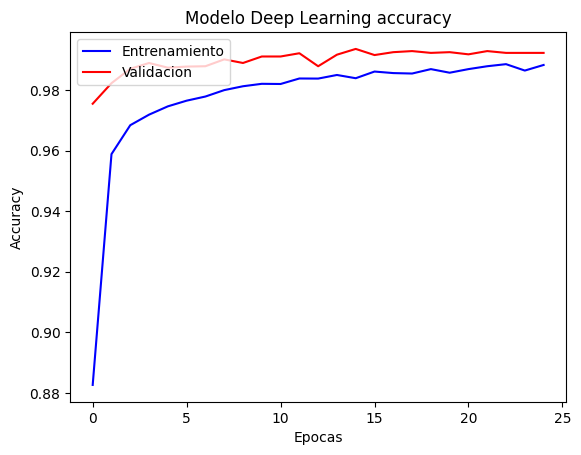

In [88]:
plt.plot(epochs_dl, accuracy_dl, 'b')
plt.plot(epochs_dl, val_accuracy_dl, 'r')
plt.title('Modelo Deep Learning accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validacion'], loc='upper left')
plt.show()

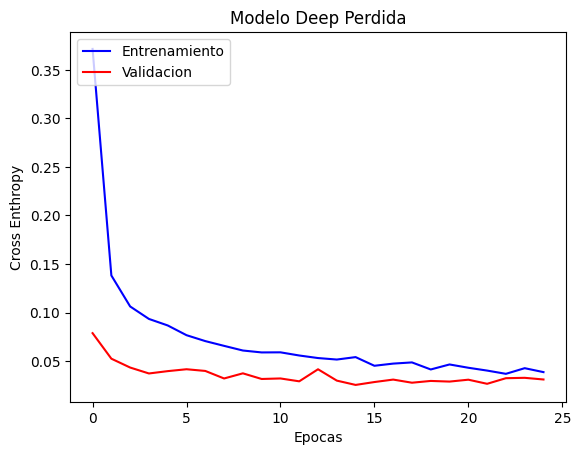

In [89]:
plt.plot(epochs_dl, loss_dl, 'b')
plt.plot(epochs_dl, val_loss_dl, 'r')
plt.title('Modelo Deep Perdida')
plt.ylabel('Cross Enthropy')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validacion'], loc='upper left')
plt.show()

In [158]:
{key: value[14] for key, value in history_dl.history.items()}

{'loss': 0.05417026951909065,
 'accuracy': 0.9838988184928894,
 'val_loss': 0.025535594671964645,
 'val_accuracy': 0.993571400642395}

### El Modelo de Deep Learning en su 15ava iteración registró una precisión de 98.39% en la data de entrenamiento y 99.36% en la de validacion

In [102]:
modelo_final_dl = load_model('reconocimiento_digito.10e')
y_pred_dl = modelo_final_dl.predict(X_test)

875/875 [==============================] - 5s 6ms/step


array([[8.58300434e-15, 1.02358025e-10, 1.00000000e+00, ...,
        1.68366973e-10, 2.69860393e-12, 9.90066531e-16],
       [9.99999046e-01, 1.59090813e-11, 6.72892631e-10, ...,
        1.37302036e-09, 7.45150430e-08, 3.81841332e-08],
       [9.00943469e-12, 3.61841390e-11, 8.40777392e-10, ...,
        2.22686776e-08, 4.55612841e-04, 9.99429882e-01],
       ...,
       [4.24106907e-25, 9.61381998e-17, 9.62890445e-17, ...,
        2.07920608e-13, 3.54281058e-13, 1.76705113e-13],
       [2.95661690e-10, 1.85560629e-11, 8.42465403e-11, ...,
        2.22775179e-05, 4.16726031e-08, 9.99965310e-01],
       [2.95804471e-14, 1.75323228e-10, 1.00000000e+00, ...,
        8.14584622e-10, 1.77275569e-10, 6.77357298e-15]], dtype=float32)

In [126]:
y_pred_dl[0].round(2)

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [153]:
print('mejor estimacion')
for i in range(5):
    print(f"Imagen {i + 1}:")
    print(np.round(y_pred_dl, 2)[i])

mejor estimacion
Imagen 1:
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Imagen 2:
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Imagen 3:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Imagen 4:
[0.15 0.   0.   0.   0.   0.   0.   0.   0.   0.84]
Imagen 5:
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


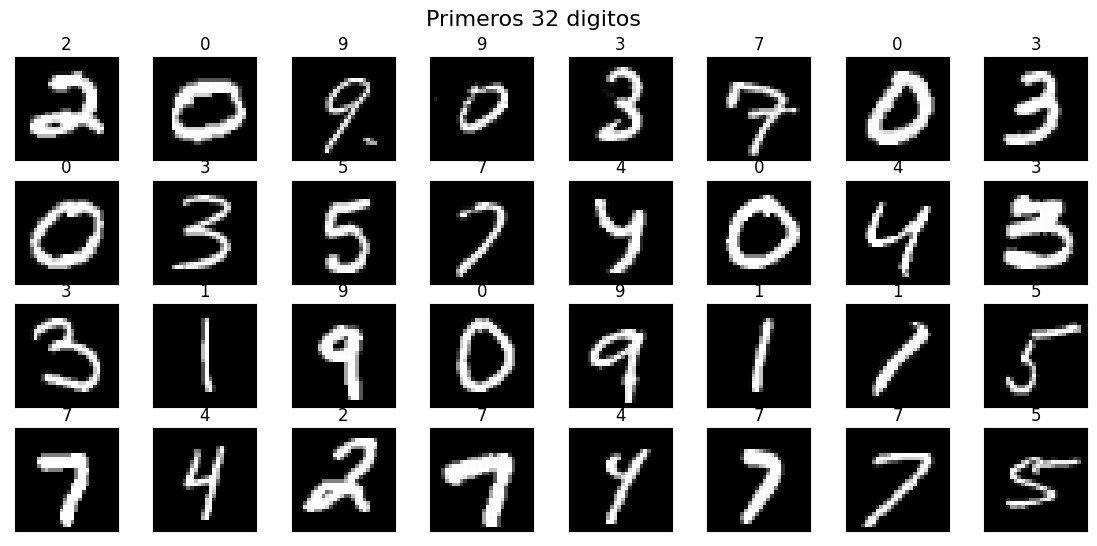

In [147]:
plt.figure(figsize=(14, 6))
for i in range(32):
    plt.subplot(4,8, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.gray)
    plt.title(y_pred_dl[i].argmax())
    plt.xticks([])
    plt.yticks([])
plt.subplots_adjust(top=0.9)
plt.suptitle("Primeros 32 digitos", fontsize=16)
plt.show()

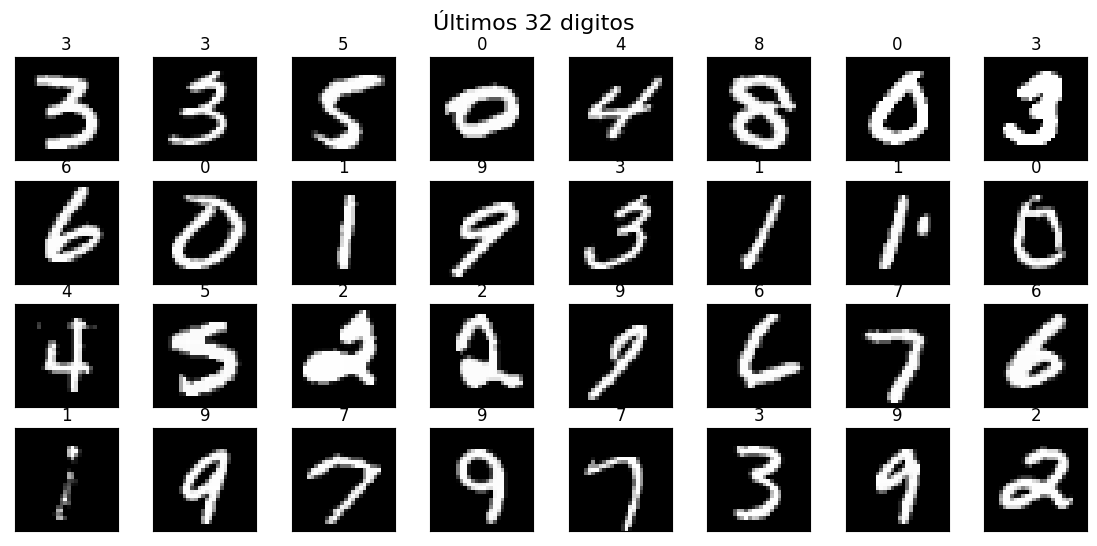

In [146]:
plt.figure(figsize=(14, 6))
for i in range(27968,28000):
    plt.subplot(4,8, i-27967)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.gray)
    plt.title(y_pred_dl[i].argmax())
    plt.xticks([])
    plt.yticks([])
plt.subplots_adjust(top=0.9)
plt.suptitle("Últimos 32 digitos", fontsize=16)
plt.show()

El modelo de red neuronal de aprendizaje profundo tiene esta arquitectura:

1. **Capa de entrada**:
   - Forma entde rarad(28,1)
   -  - Esto indica que la red espera imágenes de entratamanoman  (28xze` píxeles con un único canal (escala de grises).

2. **Capa de Convolución (1)**:
   - Número de filtros: 32
   - Tamaño del kernel: (5, 5)
   - Relleno ('same'): Esto significa que las dimensiones espaciales del mapa de características de salida serán las mismas que las de Para garantizar que la salida tenga las mismas dimensiones espaciales que la entrada (28x28 en este caso), se puede agregar relleno a la imagen de entrada. El relleno implica agregar filas y columnas adicionales de ceros alrededor de la imagen de entrada. En este escenario, el mapa de características de salida tendrá las mismas dimensiones espaciales que la entrada, pero los valores en los bordes de la salida pueden verse influ.
ar Unit)

3. **Capa de MaxPooling (1)**:
   - Se utiliza el tamaño de agrupación predeterminado de (2, 2), lo que reduce a la mitad las dimensiones espaciales del mapa de características.

4. **Capa de Dropout (1)**:
   - Tasa de abandono: 0.4 - Esta capa ayuda a prevenir el sobreajuste al establecer aleatoriamente una fracción de las unidades de entrada en 0 durante el entrenamiento.

5. **Capa de Convolución (2)**:
   - Número de filtros: 64
   - Tamaño del kernel: (5, 5)
   - Relleno ('same')
   - Función de activación: ReLU

6. **Capa de MaxPooling (2)**:
   - Tamaño de agrupación predeterminado de (2, 2).

7. **Capa de Dropout (2)**:
   - Tasa de abandono: 0.5

8. **Capa de Aplanamiento (Flatten)**:
   - Esta capa aplanará el mapa de características 2D de la capa anterior en un vector 1D. Prepara los datos para las capas totalmente conectadas.

9. **Capa Densa (Totalmente Conectada) (1)**:
   - Número de neuronas: 64
   - Función de activación: ReLU
   - Tasa de abandono: 0.4

10. **Capa Densa (Totalmente Conectada) (2 - Capa de Salida)**:
    - Número de neuronas: 10 - Esto corresponde a las 10 clases posibles (dígitos del 0 al 9).
    - Función de activación: Softmax - Se utiliza para la clasificación multiclase y produce probabilidades de clase.

En resumen, este modelo consta de dos capas de convolución con capas de max-pooling y capas de dropout en el medio para reducir el sobreajuste. Después de aplanar los mapas de características, hay dos capas totalmente conectadas, nuevamente con capas de dropout para regularización. La capa de salida final utiliza la activación softmaxmodelo al reducir el riesgo de sobreajuste.

## Reconocimiento por vecino más cercano

In [222]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

In [223]:
X_train = df.iloc[:,1:]
X_train = scaler.fit_transform(X_train.astype('float32'))
X_train = X_train.reshape((X_train.shape[0],-1))
y_train = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [225]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy_knn = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy_knn * 100:.2f}%')

Accuracy: 96.67%


### El Modelo de ML por KNN registró una precisión de 96.67%